# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [3]:
print(df.shape)

(1898, 9)


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [5]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [6]:
column_name = 'food_preparation_time'
min_value = df[column_name].min()
avg_value = df[column_name].mean()
max_value = df[column_name].max()
print(f"For {column_name}: Min = {min_value}, Mean = {avg_value}, Max = {max_value}")

For food_preparation_time: Min = 20, Mean = 27.371970495258168, Max = 35


#### Observations:


### **Question 5:** How many orders are not rated?

In [7]:
value_cnt = df['rating'].value_counts()
print(value_cnt['Not given'])

736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
# Check the number of unique values per column

num_of_entries = 1898

print(f"[number of unique values] / [total number of entries]")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"'{col}': {unique_count} / {num_of_entries} ")


[number of unique values] / [total number of entries]
'order_id': 1898 / 1898 
'customer_id': 1200 / 1898 
'restaurant_name': 178 / 1898 
'cuisine_type': 14 / 1898 
'cost_of_the_order': 312 / 1898 
'day_of_the_week': 2 / 1898 
'rating': 4 / 1898 
'food_preparation_time': 16 / 1898 
'delivery_time': 19 / 1898 


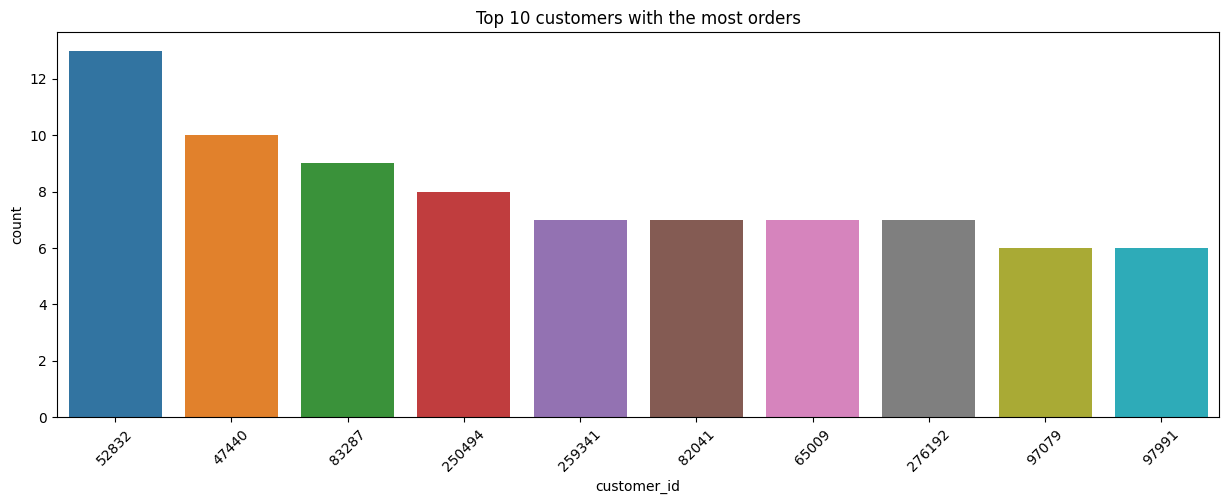

In [12]:
# Customer id

top_ten_customer = df['customer_id'].value_counts().head(10).index
df_top_ten_customer = df[df['customer_id'].isin(top_ten_customer)]

plt.figure(figsize = (15,5))
plt.title('Top 10 customers with the most orders')
sns.countplot(data = df_top_ten_customer, x = 'customer_id',order=top_ten_customer)
plt.xticks(rotation=45)
plt.show()

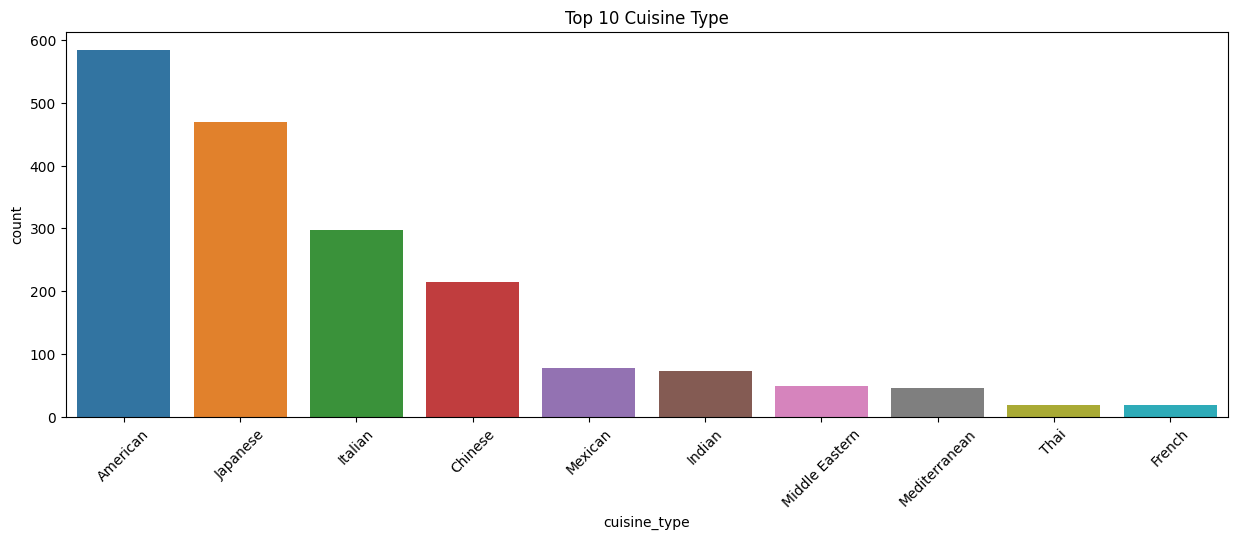

In [10]:
# Cuisine type

top_ten = df['cuisine_type'].value_counts().head(10).index
df_top_ten = df[df['cuisine_type'].isin(top_ten)]

plt.figure(figsize = (15,5))
plt.title('Top 10 Cuisine Type')
sns.countplot(data = df_top_ten, x = 'cuisine_type',order=top_ten)
plt.xticks(rotation=45)
plt.show()

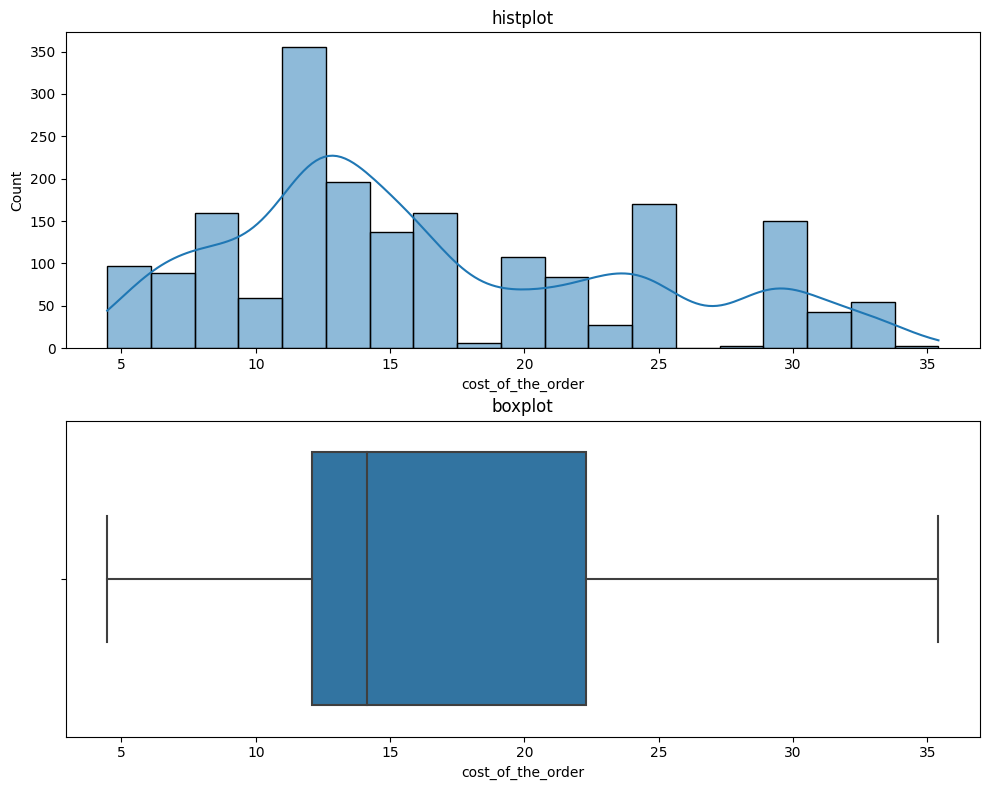

In [11]:
# Cost of orders

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(data=df,x='cost_of_the_order',ax=axes[0],kde=True) 
axes[0].set_title('histplot')

sns.boxplot(data=df,x='cost_of_the_order',ax=axes[1]) 
axes[1].set_title('boxplot')

plt.tight_layout(h_pad=0.5) 
plt.show()


THe histogram for cost of order is skewed to the right. This indicates majority of orders equal or less than the mean cost of order

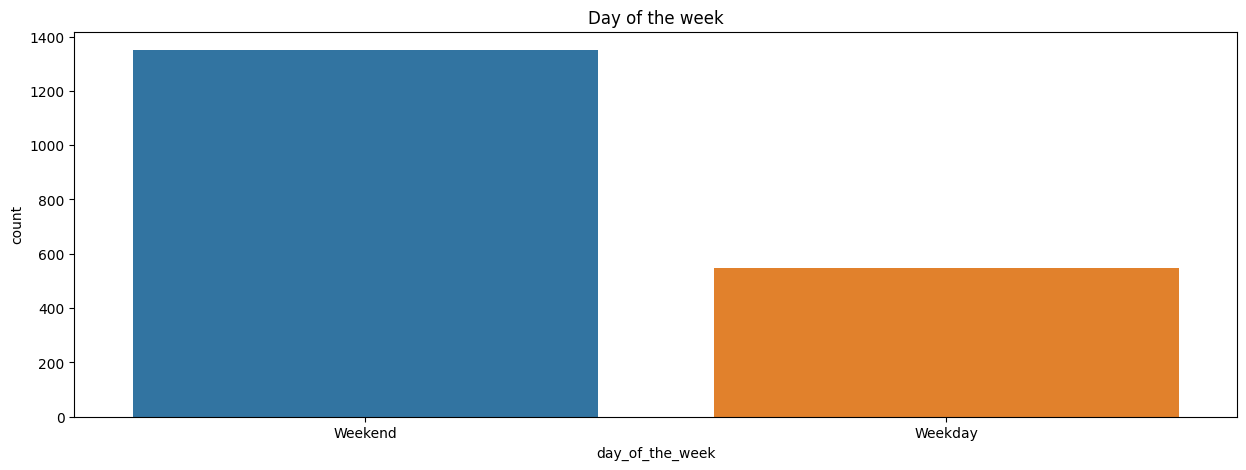

In [22]:
# Day of the week

plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'day_of_the_week')
plt.title('Day of the week')
plt.show()

Weekend's have over double the orders as the weekday

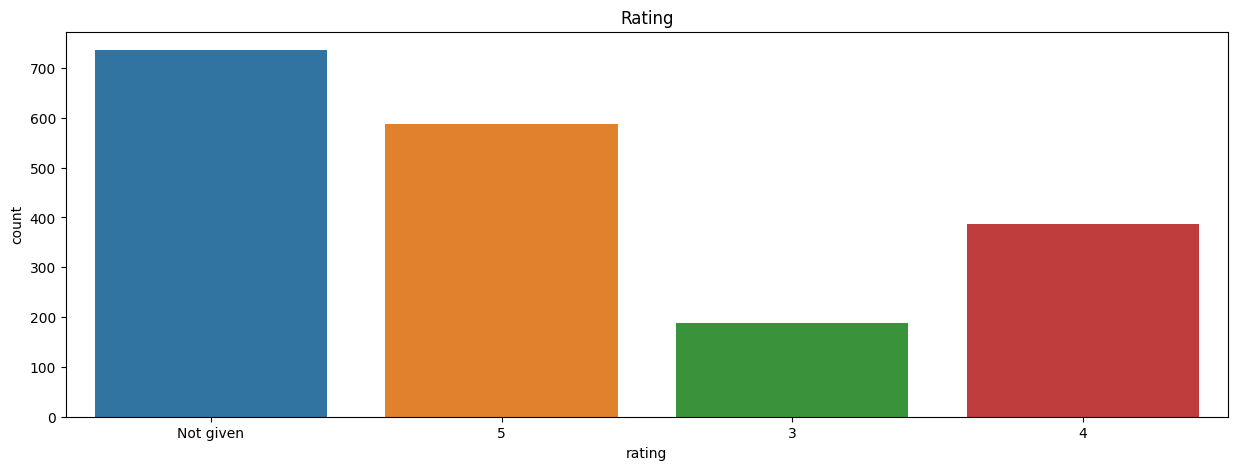

In [21]:
#Rating

plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'rating')
plt.title('Rating')
plt.show()

In [18]:
percent_of_not_given = round((len(df[df['rating'] == 'Not given']) / len(df)) * 100,2)
print(f'{percent_of_not_given}% of orders do not have ratings' )

38.78% of orders do not have ratings


Since ~40% of orders don't have ratings, this variable will not be used in further analysis

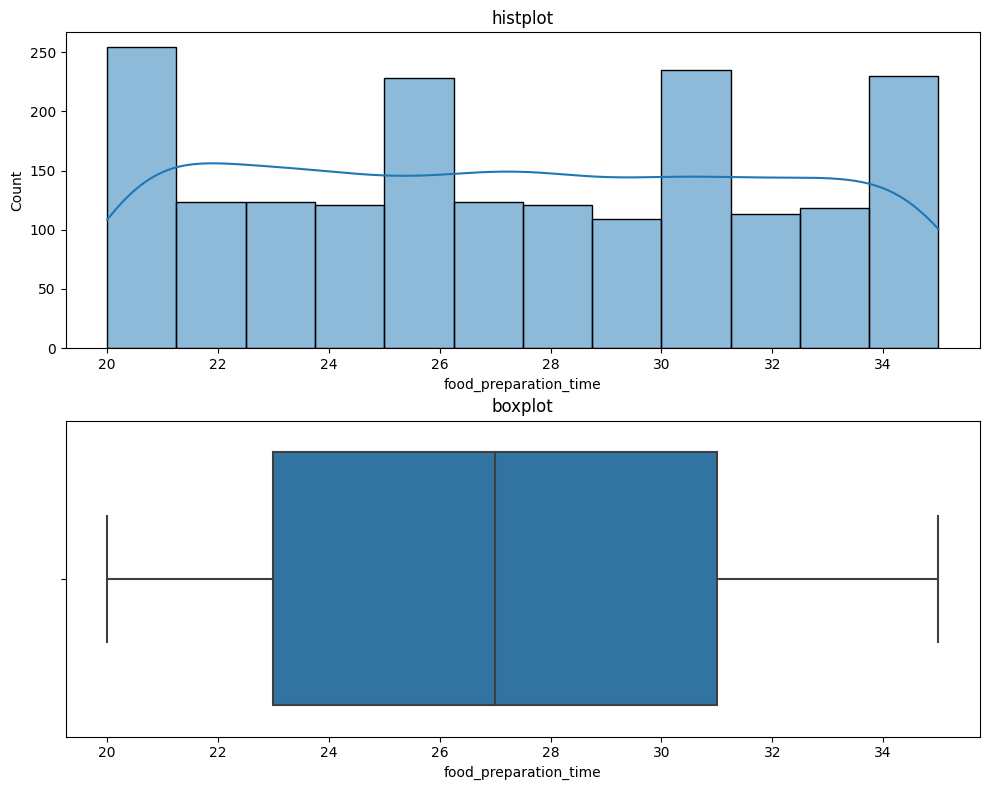

In [24]:
# food_preparation_time
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(data=df,x='food_preparation_time',ax=axes[0],kde=True) 
axes[0].set_title('histplot')

sns.boxplot(data=df,x='food_preparation_time',ax=axes[1])
axes[1].set_title('boxplot')

plt.tight_layout(h_pad=0.5) 
plt.show()


The histogram for food preparation time seems to have a uniform distribution. This is provides evidence this variable doesn't signficantly impact number of orders

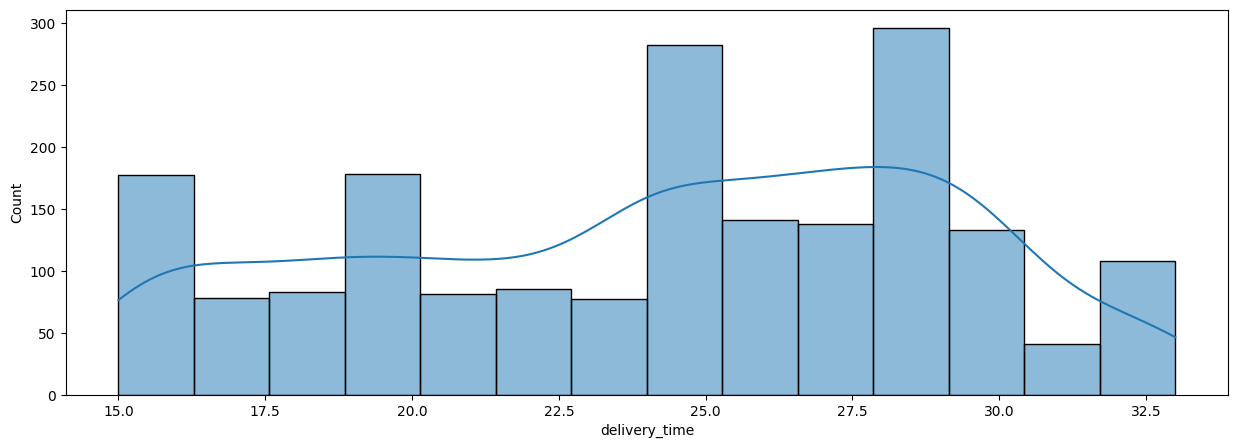

In [20]:
#delivery_time

plt.figure(figsize = (15,5))
sns.histplot(data=df['delivery_time'],bins='auto',kde=True)
plt.show()

The histogram for delivery has distribution similar to uniform

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

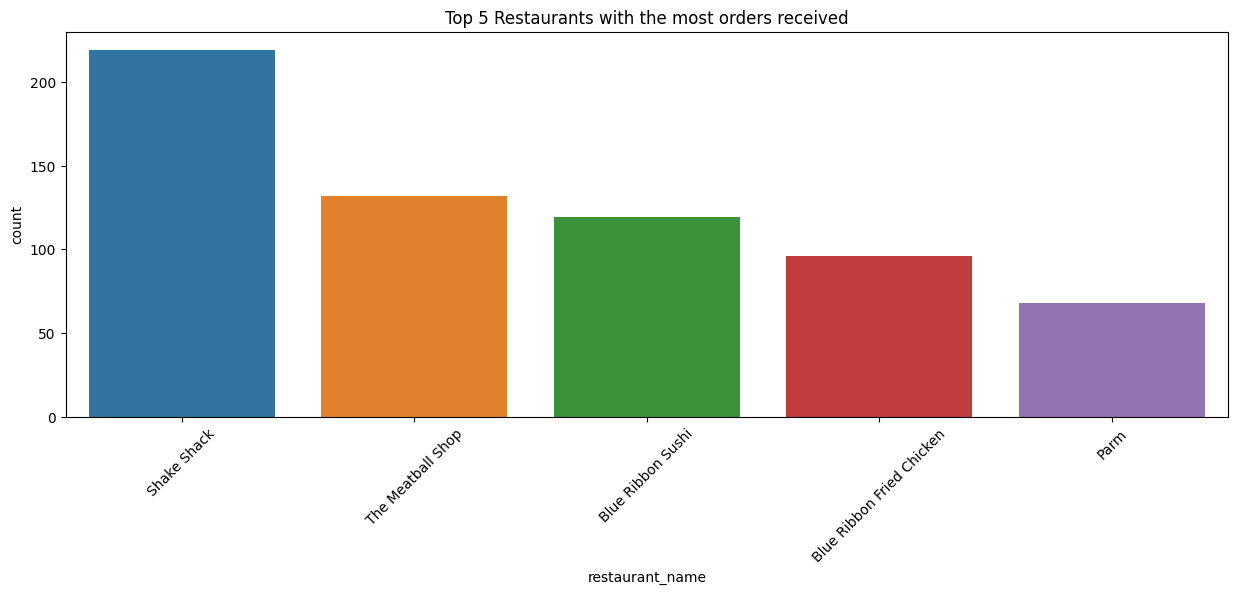

In [7]:
top_restaurants = df['restaurant_name'].value_counts().head(5).index

df_top_restaurants = df[df['restaurant_name'].isin(top_restaurants)]

plt.figure(figsize = (15,5))
plt.title('Top 5 Restaurants with the most orders received')
sns.countplot(data = df_top_restaurants, x = 'restaurant_name',order=top_restaurants)
plt.xticks(rotation=45)
plt.show()

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [10]:
most_common_value, count = df['cuisine_type'].value_counts().idxmax(), df['cuisine_type'].value_counts().max()

print("Most popular cuisine on weekends is", most_common_value)
print("Count:", count)

Most popular cuisine on weekends is American
Count: 584


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [12]:
threshold_value = 20

filtered_df = df[df['cost_of_the_order'] > threshold_value]

percentage_greater_than_threshold = round((len(filtered_df)/len(df)) * 100,2)

print(f"Percentage of orders cost more than 20 dollars is {percentage_greater_than_threshold}%")

Percentage of orders cost more than 20 dollars is 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time?

In [25]:
column_name = 'delivery_time'
avg_value = df[column_name].mean()
print(f"Mean order delivery time is {round(avg_value,2)} mins")

Mean order delivery time is 24.16 mins


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [9]:
top_three_customers = df['customer_id'].value_counts().head(3)
print(top_three_customers)


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [3]:
df.info() # Quick overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Analyzing the cost of the order vs day of the week

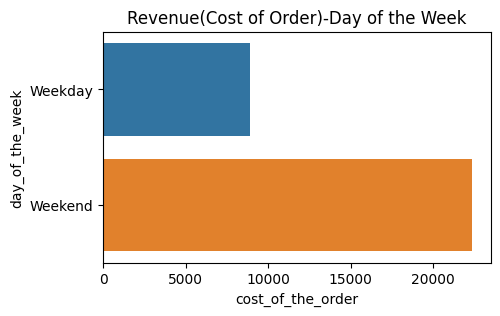

In [69]:
# Analyzing cost of the order vs day of the week
cost_day_df = df.copy()

# Get sum of cost of order per day of week type
cost_day_df = cost_day_df.groupby(['day_of_the_week'])['cost_of_the_order'].sum()
cost_day_df = cost_day_df.reset_index()

plt.figure(figsize=(5,3))
plt.title('Revenue(Cost of Order)-Day of the Week')
sns.barplot(y='day_of_the_week', x='cost_of_the_order', data=cost_day_df);


In general, during the weekend, restaurants make over double the profit as compared to the week

Check to see if there are restaurants that only delivery during the weekends or weekdays. 

In [27]:
cost_day_restaurant_df = df.copy()

# Get sum of cost of the order by restaurant and day of the week
cost_day_restaurant_df = df.groupby(['restaurant_name', 'day_of_the_week'])['cost_of_the_order'].sum().reset_index()
pivot_df = cost_day_restaurant_df.pivot_table(index='restaurant_name', columns='day_of_the_week', values='cost_of_the_order', aggfunc='sum')
pivot_df.info()
pivot_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 'wichcraft to indikitch
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weekday  121 non-null    float64
 1   Weekend  159 non-null    float64
dtypes: float64(2)
memory usage: 4.2+ KB


day_of_the_week,Weekday,Weekend
restaurant_name,,
'wichcraft,8.10,NaN
12 Chairs,45.35,43.22
5 Napkin Burger,16.30,63.54
67 Burger,29.05,NaN
Alidoro,NaN,12.61


A quick glance shows there a number of restaurants that doesn't deliver during the weekdays or weekends

In [28]:
# Drop any restaurants that doesn't deliver during weekdays or weekends
cleaned_df = pivot_df.dropna(how='any')
cleaned_df.head()


day_of_the_week,Weekday,Weekend
restaurant_name,,
12 Chairs,45.35,43.22
5 Napkin Burger,16.30,63.54
Amma,40.31,36.38
Amy Ruth's,19.61,16.11
Asuka Sushi,22.75,42.25


In [30]:
# Get the total cost orders during weekday and weekends

weekday_sum = round(cleaned_df['Weekday'].sum(),0)
weekend_sum = round(cleaned_df['Weekend'].sum(),0)
day_to_weekend_ratio = round(weekend_sum/weekday_sum,2)

print(f'Total cost of order during weekday:{weekday_sum} and weekend:{weekend_sum}')
print(f'The total cost of order weekend to weekday ratio: {day_to_weekend_ratio}')

Total cost of order during weekday:8565.0 and weekend:20519.0
The total cost of order weekend to weekday ratio: 2.4


The the total cost of order weekday to weekend ratio is greater than 2. This provides more evidence that more money is made over the weekend as compared to week. For now I will only focus on restaurants that deliver over the weekends

Now I'm checking the ratio between top and bottom 25% restaurants for cost of order, rating, food preparation time, and delivery time. Ranking of restaurants is determined by number of orders. Ratio is calculated by taking the top 25% stats divided by bottom 25% stats

In [31]:
import math

In [32]:
# Removed all data pertaining to weekday
weekend_df = df.copy()
weekend_df = weekend_df[weekend_df['day_of_the_week'] != 'Weekday']

percent = 0.25

# Get count of 10% of the restaurant
num_of_rest = math.ceil(df['restaurant_name'].nunique() * percent)
# Get top restaurants with the most orders over the weekend
top_restaurants = weekend_df['restaurant_name'].value_counts().nlargest(num_of_rest).index.to_list()
bottom_restaurants = weekend_df['restaurant_name'].value_counts().nsmallest(num_of_rest).index.to_list()

# Filter dataframe with just the top and bottom dataframe
top_df = weekend_df[weekend_df['restaurant_name'].isin(top_restaurants)]
bottom_df = weekend_df[weekend_df['restaurant_name'].isin(bottom_restaurants)]

# Filter dataframe with just the top and bottom dataframe
top_df = weekend_df[weekend_df['restaurant_name'].isin(top_restaurants)]
bottom_df = weekend_df[weekend_df['restaurant_name'].isin(bottom_restaurants)]

# Compare average cost of order, rating, food preparation time, and delivery time
numeric_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
avg_top_restaurants = top_df.groupby(['restaurant_name'])[numeric_columns].mean().reset_index()
avg_bottom_restaurants = bottom_df.groupby(['restaurant_name'])[numeric_columns].mean().reset_index()

avg_top = avg_top_restaurants.select_dtypes(include='number').mean()
avg_bottom = avg_bottom_restaurants.select_dtypes(include='number').mean()

# Get ratio between top and bottom restaurants for cost of order, rating, food preparation time, and delivery time
print(avg_top/avg_bottom)

cost_of_the_order        1.009355
food_preparation_time    1.011706
delivery_time            1.023197
dtype: float64


The cost of order, food preparation, and delivery time doesn't appear to significantly vary between top and bottom 25% restaurants

Now lets check if there are signficant difference between type of cuisine ordered between top and bottom 5 restaurants

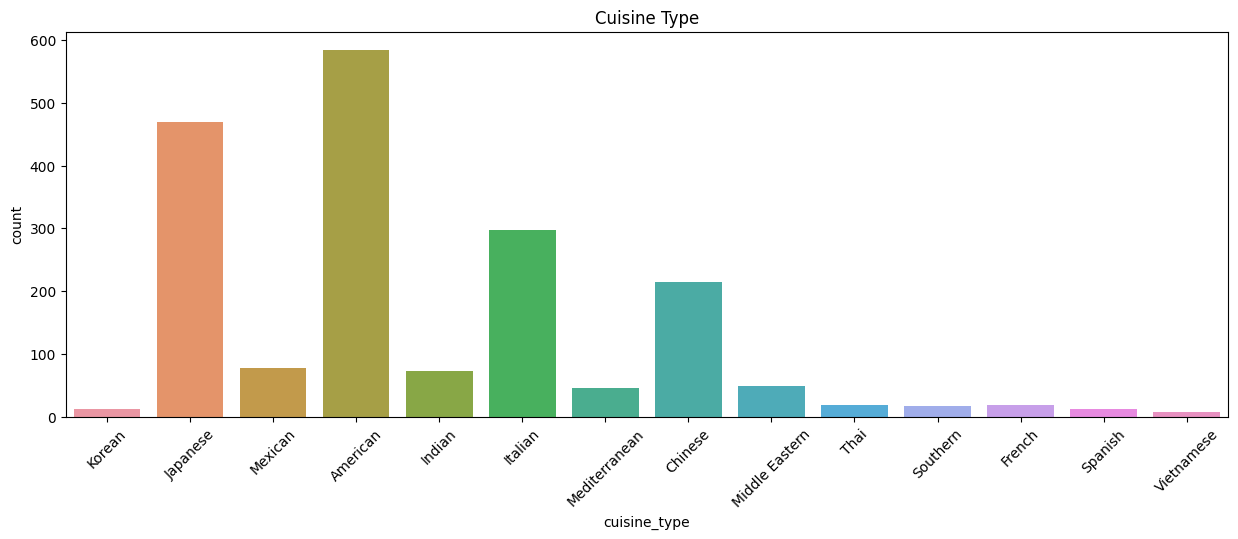

In [33]:
# First check which cuisine type is most popular (this is determined by number of orders)

plt.figure(figsize = (15,5))
plt.title("Cuisine Type")
sns.countplot(data = df, x = 'cuisine_type')
plt.xticks(rotation=45)
plt.show()

Japanese, American, Italian, and Chinese seem to be the most popular cuisine types

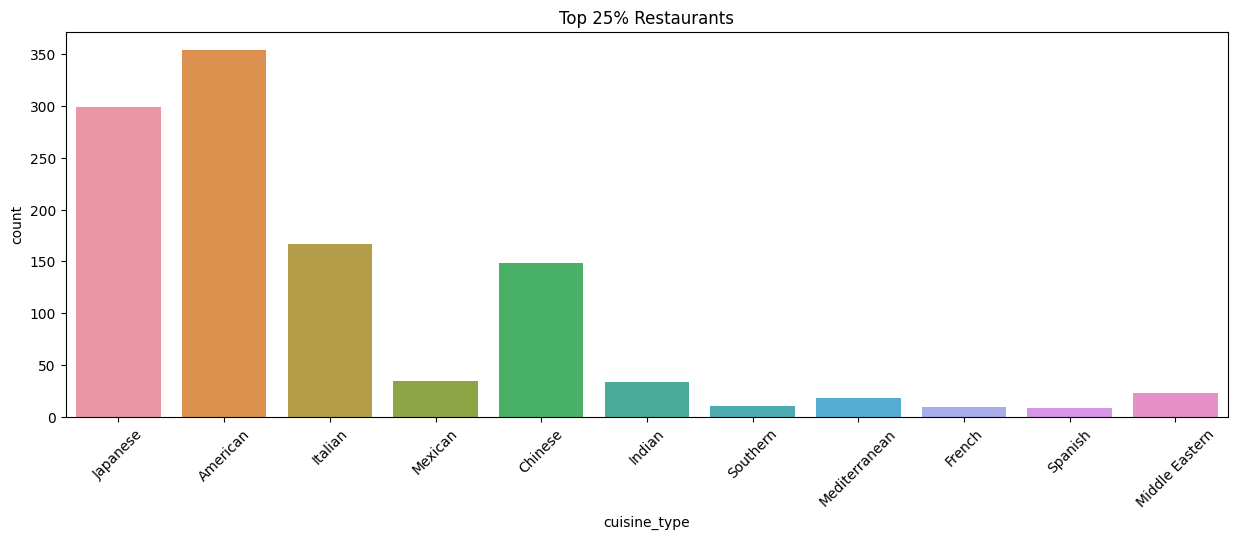

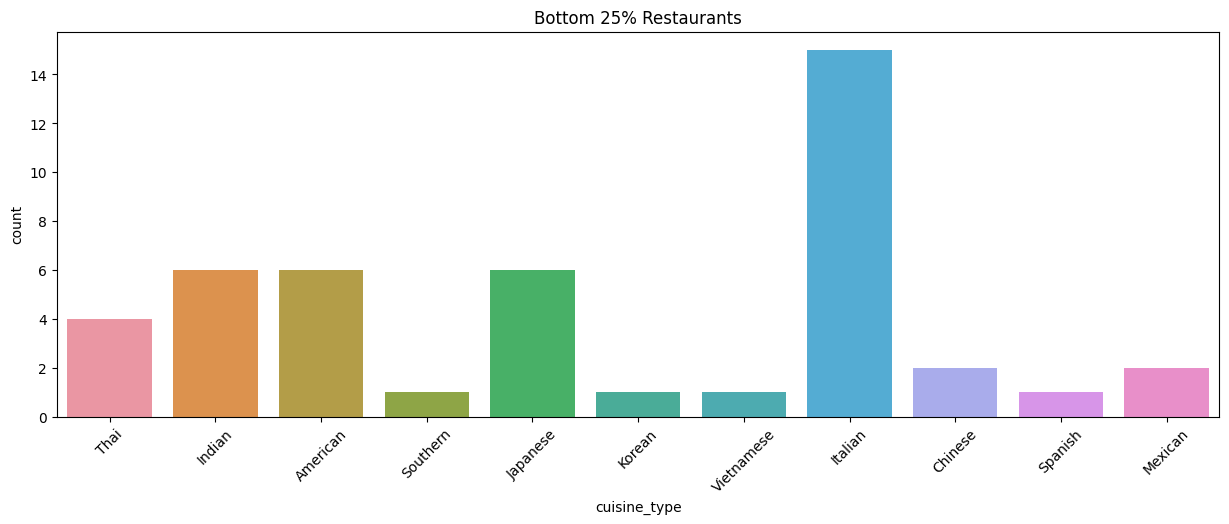

In [34]:
plt.figure(figsize = (15,5))
plt.title("Top 25% Restaurants")
sns.countplot(data = top_df, x = 'cuisine_type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize = (15,5))
plt.title("Bottom 25% Restaurants")
sns.countplot(data = bottom_df, x = 'cuisine_type')
plt.xticks(rotation=45)
plt.show()


The top restaurants deliver signficantly more popular cuisines than bottom 25% restaurants. It's possible that restaurants serving top 4 cuisines are more likely to receive more orders. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [4]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [15]:
# Get restaurant names with greater than 50 rating counts
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
tmp_df = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
mean_df = tmp_df.groupby(['restaurant_name'])['rating'].mean().reset_index().dropna()

# Get retaurants with average rating greater than 4 and 50+ rating count
result_df = mean_df[mean_df['rating'] > 4]
result_df.head()


,restaurant_name,rating
0,Blue Ribbon Fried Chicken,4.328125
1,Blue Ribbon Sushi,4.219178
2,Shake Shack,4.278195
3,The Meatball Shop,4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [16]:
copy_df = df.copy()

#Function to determine revenue
def comp_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15 
    else:
        return 0

# Compute revenue that satisfy the conditions
copy_df['Revenue'] = copy_df['cost_of_the_order'].apply(comp_rev)
copy_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [17]:
# Get net revenue generated
total_rev = round(copy_df['Revenue'].sum(),2)
print(f'The net revenue generated is around {total_rev} dollars')

The net revenue generated is around 6166.3 dollars


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [18]:
copy_df = df.copy()

# Calculate total order to delivery time
copy_df['total_time'] = copy_df['food_preparation_time'] + copy_df['delivery_time']
copy_df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [23]:
# Total amount of orders
total_quant = len(copy_df)

# Get count of orders with total time greater than 60
greater_len = len(copy_df[copy_df['total_time'] > 60])

# Get percentage
result = round(greater_len / total_quant,4)*100
print(f'The percentage of orders taking more than 60 minutes from the time the order is placed: {result} %')

The percentage of orders taking more than 60 minutes from the time the order is placed: 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [24]:
# Mean delivery time on weekdays
mean_weekday = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(),2)

# Mean delivery time on weekends
mean_weekend = round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(),2)

#Print result
print(f'Mean delivery time on weekdays is {mean_weekday} min. and {mean_weekend} min. on weekend')

Mean delivery time on weekdays is 28.34 min. and 22.47 min. on weekend


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

Conclusions
- Since cost of the order, food preparation time, and delivery time doesn't vary significantly between top and bottom 25% of the restaurants. Ranking of the restaurants is determined by the number of orders received
- Top 25% of the resturants serve Japanese, American, Italian, and Chinese cuisines

Recommendations
- Since the type of cuisines appear to significantly impact number of orders receieved, I would recommend the food aggregator company to focus deliveries for restaurants that specialize in Japanese, American, Italian, and/or Chinese cuisines. 

---